# 掛載 Google Driver

In [1]:
import os
# import Google Drive 套件
from google.colab import drive
# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')

os.chdir('./gdrive/MyDrive/2025_IMBD')      # 檔案目錄

Mounted at /content/gdrive


# Data Process Function

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 繪製折線圖
def lineplot_fun(df, feats, x_index, labels=None, title=None):
  plt.figure(figsize=(15, 8))
  for i, feat in enumerate(feats):
    if labels is not None:
      label = labels[i]
    else:
      label = None
    sns.lineplot(data=df, y=feat, x=x_index, label=label)

  # 將圖例放在圖形外右上方
  if label is not None:
    plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
  if title is not None:
    plt.title(title)
  plt.show()

In [5]:
## 資料處理程式。加入 speed & feed rate 參數

def df_process_speed_and_feedrate(df, rowx):
  all_times = df['Time'].iloc[-1]
  time_rate = rowx[['Part1_time', 'Part2_time', 'Part3_time']].to_numpy()
  time_rate = time_rate[~np.isnan(time_rate)]
  time_rate = time_rate / time_rate.sum() * all_times

  df['speed'] = None
  df['feed_rate'] = None

  c = 0
  for i, x in enumerate(time_rate):
    start = c
    end = c + x
    speed = rowx[f'Part{i+1}_speed']
    feedrate = rowx[f'Part{i+1}_feedrate']
    indx = (df['Time'] > start) & (df['Time'] <= end)
    df.loc[indx, 'speed'] = speed
    df.loc[indx, 'feed_rate'] = feedrate
    c += x

  return df

# 資料處理

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## 輸入所有資料
train_path = './train'
train_datas_path = os.listdir(train_path)
for i in range(len(train_datas_path)):
  train_datas_path[i] = os.path.join(train_path, train_datas_path[i])

train_datas_path = sorted(train_datas_path)
print(len(train_datas_path))
train_datas_path

43


['./train/_20200615_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train/_20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train/_20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train/_20200618_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train/_20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train/_20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train/_20200703_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train/_20200706_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train/_20200708_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train/_20200709_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train/_20200710_GV1-1203_1k+2krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train/_20200713_GV1-1203_2k+1krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train/_20200723_GV1-1203_ConditionCombined(wAC-from0-25Cto20C).csv',
 './train/_20200727_GV1-1203_2000rpm_XZ-5m-min_5H

In [ ]:
import io
import pandas as pd

columns = [
  'date',
  'Part1_speed', 'Part1_feedrate', 'Part1_time',
  'Part2_speed', 'Part2_feedrate', 'Part2_time',
  'Part3_speed', 'Part3_feedrate', 'Part3_time',
]

df_condition = pd.read_csv(io.StringIO('''
20200615,2000,5000,5,,,,,,
20200616,1000,5000,5,,,,,,
20200617,1000,5000,2.5,2000,5000,2.5,,,
20200618,2000,5000,2.5,1000,5000,2.5,,,
20200701,2000,5000,5,,,,,,
20200702,1000,5000,5,,,,,,
20200703,1000,5000,2.5,2000,5000,2.5,,,
20200706,2000,5000,2.5,1000,5000,2.5,,,
20200708,2000,5000,6,,,,,,
20200709,1000,5000,6,,,,,,
20200710,1000,5000,3,2000,5000,3,,,
20200713,2000,5000,3,1000,5000,3,,,
20200715,1800,1000,2.5,0,0,1,1200,5000,2.5
20200720,2000,5000,3,1000,5000,3,,,
20200721,1000,5000,3,2000,5000,3,,,
20200723,1200,3000,2.5,0,0,1,1800,5000,2.5
20200727,2000,5000,5,,,,,,
20200729,1000,5000,5,,,,,,
20200730,1000,5000,2.5,2000,5000,2.5,,,
20200805,1000,5000,5,,,,,,
20200807,2000,5000,2.5,1000,5000,2.5,,,
20200810,1800,5000,2.5,0,0,1,1200,5000,2.5
20200813,2000,5000,6,,,,,,
20200814,1000,5000,6,,,,,,
20200817,2000,5000,6,,,,,,
20200818,1000,5000,6,,,,,,
20200819,1800,5000,2.5,0,0,1,1200,5000,2.5
20200820,2000,5000,5,,,,,,
20200821,1000,5000,5,,,,,,
20200824,1000,5000,5,,,,,,
20200827,2000,5000,5,,,,,,
20200828,2000,5000,5,,,,,,
20200901,2000,5000,2.5,1000,5000,2.5,,,
20200902,1000,5000,2.5,2000,5000,2.5,,,
20200903,2000,5000,2.5,1000,5000,2.5,,,
20200904,1000,5000,2.5,2000,5000,2.5,,,
20200907,1000,5000,6,,,,,,
20200908,2000,5000,6,,,,,,
20200909,1000,5000,6,,,,,,
20200910,2000,5000,6,,,,,,
20200914,1000,5000,5,,,,,,
20200915,2000,5000,5,,,,,,
20200916,1000,5000,5,,,,,,
20200917,1000,5000,5,,,,,,
20200918,1000,5000,6,,,,,,
20200923,2000,5000,2.5,0,0,1,2000,5000,2.5
20200924,1000,5000,2.5,0,0,1,1000,5000,2.5
20200928,1000,5000,2.5,0,0,1,2000,5000,2.5
20200929,2000,5000,2.5,0,0,1,1000,5000,2.5
20200930,2000,5000,2.5,0,0,1,1000,5000,2.5
20201005,1000,5000,2.5,0,0,1,1000,5000,2.5
20201006,2000,5000,2.5,0,0,1,2000,5000,2.5
20201007,1000,5000,6,,,,,,
20201008,1000,5000,6,,,,,,
20201015,1000,5000,6,,,,,,
20201016,1000,5000,6,,,,,,
'''), header=None)

df_condition.columns = columns
print(df_condition.shape)

(56, 10)


In [ ]:
feats = [
  'Time', 'speed', 'feed_rate',
  'PT01', 'PT02', 'PT03', 'PT04', 'PT05', 'PT06', 'PT07', 'PT08', 'PT09', 'PT10', 'PT11', 'PT12', 'PT13',
  'TC01', 'TC02', 'TC03', 'TC04', 'TC05', 'TC06', 'TC07', 'TC08',
  'Spindle Motor', 'X Motor', 'Z Motor',
  'Disp. X', 'Disp. Z'
]

for i in range(len(train_datas_path)):
  path = train_datas_path[i]
  print(path)
  date = path.split('/')[-1].split('_')[1]
  print(date)
  indx = (df_condition['date'] == int(date))
  rowx = df_condition.loc[indx].reset_index(drop=True).iloc[0]

  df = pd.read_csv(path)
  dfprocess = df_process_speed_and_feedrate(df, rowx)
  dfprocess = dfprocess[feats]

  save_path = path.replace('train', 'train_process')
  dfprocess.to_csv(save_path, index=False)

./train/_20200615_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-25C).csv
20200615
./train/_20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-25C).csv
20200616
./train/_20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-25C).csv
20200617
./train/_20200618_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-25C).csv
20200618
./train/_20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-20C).csv
20200701
./train/_20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-20C).csv
20200702
./train/_20200703_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-20C).csv
20200703
./train/_20200706_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-20C).csv
20200706
./train/_20200708_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv
20200708
./train/_20200709_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv
20200709
./train/_20200710_GV1-1203_1k+2krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv
20200710
./train/_20200713_GV1-1203_2k+1krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv
20200713
./train/_20200723_GV1-1203_ConditionCombined(wAC-from0-25Cto20

In [ ]:
path = './train/_20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-25C).csv'
df = pd.read_csv(path)

In [ ]:
df

,Time,PT01,PT02,PT03,PT04,PT05,PT06,PT07,PT08,PT09,...,TC04,TC05,TC06,TC07,TC08,Spindle Motor,X Motor,Z Motor,Disp. X,Disp. Z
0,0.848,22.4,22.6,22.7,21.8,21.9,21.8,21.8,22.3,22.1,...,21.5,21.6,21.3,23.1,23.3,19.0,20.0,20.0,0.000000,0.000000
1,1.016,22.4,22.6,22.7,21.8,21.9,21.8,21.9,22.3,22.1,...,21.6,21.6,21.3,23.2,23.4,19.0,20.0,20.0,-2.178043,0.000000
2,1.184,22.5,22.6,22.7,21.8,21.9,21.8,21.9,22.2,22.1,...,21.5,21.6,21.3,23.1,23.4,19.0,20.0,20.0,-2.178043,-0.086104
3,1.352,22.5,22.6,22.7,21.8,21.9,21.8,21.9,22.3,22.1,...,21.4,21.5,21.2,23.1,23.2,19.0,20.0,20.0,-2.375811,-0.086104
4,1.520,22.4,22.6,22.7,21.8,21.9,21.8,21.9,22.3,22.2,...,21.5,21.6,21.3,23.2,23.2,19.0,20.0,20.0,-2.375811,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,358.123,31.7,32.5,33.4,27.6,29.6,27.5,27.3,31.3,27.9,...,25.3,27.5,26.3,28.2,23.7,32.0,28.0,28.0,20.989359,-29.234757
603,358.799,31.7,32.4,33.3,27.6,29.5,27.5,27.3,31.3,27.9,...,25.2,27.5,26.3,28.1,23.9,31.0,28.0,29.0,20.989359,-29.234757
604,359.473,31.7,32.4,33.3,27.6,29.5,27.5,27.3,31.2,27.8,...,25.2,27.6,26.3,28.1,23.9,31.0,28.0,29.0,20.989359,-29.234757
605,360.148,31.7,32.4,33.3,27.6,29.5,27.5,27.3,31.2,27.9,...,25.2,27.4,26.3,28.1,24.1,31.0,28.0,28.0,20.989359,-29.234757


In [ ]:
df_condition

,date,Part1_speed,Part1_feedrate,Part1_time,Part2_speed,Part2_feedrate,Part2_time,Part3_speed,Part3_feedrate,Part3_time
0,20200615,2000,5000,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,20200616,1000,5000,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,20200617,1000,5000,2.5,2000.0,5000.0,2.5,NaN,NaN,NaN
3,20200618,2000,5000,2.5,1000.0,5000.0,2.5,NaN,NaN,NaN
4,20200701,2000,5000,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,20200702,1000,5000,5.0,NaN,NaN,NaN,NaN,NaN,NaN
6,20200703,1000,5000,2.5,2000.0,5000.0,2.5,NaN,NaN,NaN
7,20200706,2000,5000,2.5,1000.0,5000.0,2.5,NaN,NaN,NaN
8,20200708,2000,5000,6.0,NaN,NaN,NaN,NaN,NaN,NaN
9,20200709,1000,5000,6.0,NaN,NaN,NaN,NaN,NaN,NaN


# 資料繪圖

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
###### 輸入所有資料
train_path = './train_process'
train_datas_path = os.listdir(train_path)
for i in range(len(train_datas_path)):
  train_datas_path[i] = os.path.join(train_path, train_datas_path[i])

train_datas_path = sorted(train_datas_path)
print(len(train_datas_path))
train_datas_path

43


['./train_process/_20200615_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train_process/_20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train_process/_20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train_process/_20200618_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train_process/_20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train_process/_20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train_process/_20200703_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train_process/_20200706_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train_process/_20200708_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train_process/_20200709_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train_process/_20200710_GV1-1203_1k+2krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train_process/_20200713_GV1-1203_2k+1krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train_process/_2020072

In [ ]:
feats = [
  'speed', 'feed_rate',
  'PT01', 'PT02', 'PT03', 'PT04', 'PT05', 'PT06', 'PT07', 'PT08', 'PT09', 'PT10', 'PT11', 'PT12', 'PT13',
  'TC01', 'TC02', 'TC03', 'TC04', 'TC05', 'TC06', 'TC07', 'TC08',
  'Spindle Motor', 'X Motor', 'Z Motor',
  'Disp. X', 'Disp. Z'
]

In [ ]:
for i, path in enumerate(train_datas_path):
  df = pd.read_csv(path)
  df = df[feats]
  if 'speed' in feats:
    df['speed'] = df['speed'] / 1000
  if 'feed_rate' in feats:
    df['feed_rate'] = df['feed_rate'] / 1000

  x_index = [i for i in range(df[feats].shape[0])]

  date = path.split('/')[-1].split('_')[1]
  lineplot_fun(df, feats, x_index, labels=feats, title=date)

Output hidden; open in https://colab.research.google.com to view.

# Model Train Function

In [8]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

In [9]:
feats = [
  'speed', 'feed_rate',
  'PT01', 'PT02', 'PT03', 'PT04', 'PT05', 'PT06', 'PT07', 'PT08', 'PT09', 'PT10', 'PT11', 'PT12', 'PT13',
  'TC01', 'TC02', 'TC03', 'TC04', 'TC05', 'TC06', 'TC07', 'TC08',
  'Spindle Motor', 'X Motor', 'Z Motor',
  'Disp. X', 'Disp. Z'
]

scaler_patameter = [
  2000, 5000,
  30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
  30, 30, 30, 30, 30, 30, 30, 30,
  40, 40, 40,
  50, 50
]

scaler_patameter = np.array(scaler_patameter)

In [10]:
## 訓練資料格式處理 function
def self_lstm_standard_scaler(df, feats, scaler_patameter):
  df = df.copy()
  df[feats] = df[feats] / scaler_patameter
  return df[feats]

def data_process(df, input_length, output_length):
  all_sequences = []
  all_targets = []

  for i in range(df.shape[0] - input_length - output_length):
    seq = df[i:i+input_length].to_numpy()
    target = df[i+input_length:i+input_length+output_length].to_numpy()
    all_sequences.append(seq)
    all_targets.append(target)

  all_sequences = torch.tensor(all_sequences, dtype=torch.float32)
  all_targets = torch.tensor(all_targets, dtype=torch.float32)
  return all_sequences, all_targets

class LSTMModel_v1(nn.Module):
  def __init__(self, input_size, hidden_layer_size, num_layers, output_size, device):
    super().__init__()
    self.device = device
    self.hidden_layer_size = hidden_layer_size
    self.num_layers = num_layers

    self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True).to(device)
    self.linear = nn.Linear(hidden_layer_size, output_size).to(device)

  def forward(self, inputs):
    h_in = torch.zeros(self.num_layers, inputs.size(0), self.hidden_layer_size).to(self.device)
    c_in = torch.zeros(self.num_layers, inputs.size(0), self.hidden_layer_size).to(self.device)
    lstm_out, (h_out, c_out) = self.lstm(inputs, (h_in, c_in))
    predictions = self.linear(lstm_out[:, -1, :])
    return predictions

# class LSTMModel_v2(nn.Module):
#   def __init__(self, input_size, hidden_layer_size, num_layers, output_size):
#     super().__init__()
#     self.hidden_layer_size = hidden_layer_size
#     self.num_layers = num_layers

#     self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
#     self.linear = nn.Linear(hidden_layer_size, output_size)

#   def forward(self, inputs, h_in, c_in):
#     lstm_out, (h_out, c_out) = self.lstm(inputs, (h_in, c_in))
#     predictions = self.linear(lstm_out[:, -1, :])
#     return predictions, (h_out, c_out)

In [11]:
## 輸入所有資料
# path = './train_process'
# datas_path = os.listdir(path)
# for i in range(len(datas_path)):
#   datas_path[i] = os.path.join(path, datas_path[i])

# for path in datas_path:
#   df = pd.read_csv(path)
#   df = df[['Disp. X', 'Disp. Z']]
#   temp = df.describe()
#   print(temp.iloc[-2])

# Model Training

In [12]:
import os
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import MinMaxScaler

In [13]:
## 輸入所有資料
path = './train_process'
datas_path = os.listdir(path)
for i in range(len(datas_path)):
  datas_path[i] = os.path.join(path, datas_path[i])

datas_path

['./train_process/_20200706_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train_process/_20200703_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train_process/_20200615_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train_process/_20200618_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train_process/_20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train_process/_20200709_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train_process/_20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train_process/_20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-25C).csv',
 './train_process/_20200708_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train_process/_20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-20C).csv',
 './train_process/_20200713_GV1-1203_2k+1krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
 './train_process/_20200727_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-30C).csv',
 './train_process/_20200805_GV1-

In [14]:
### 資料分割
train_path = [
  './train_process/_20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-25C).csv',
  './train_process/_20200618_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-25C).csv',
  './train_process/_20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-20C).csv',
  './train_process/_20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-20C).csv',
  './train_process/_20200703_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-20C).csv',
  './train_process/_20200706_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-20C).csv',
  './train_process/_20200708_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
  './train_process/_20200709_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
  './train_process/_20200710_GV1-1203_1k+2krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
  './train_process/_20200713_GV1-1203_2k+1krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
  './train_process/_20200727_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-30C).csv',
  './train_process/_20200729_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-30C).csv',
  './train_process/_20200730_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-30C).csv',
  './train_process/_20200807_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-30C).csv',
  './train_process/_20200814_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-30Cto20C).csv',
  './train_process/_20200817_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-20Cto30C).csv',
  './train_process/_20200818_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-20Cto30C).csv',
  './train_process/_20200820_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-18C).csv',
  './train_process/_20200821_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-22C).csv',
  './train_process/_20200827_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-15C).csv',
  './train_process/_20200828_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-35C).csv',
  './train_process/_20200901_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-35C).csv',
  './train_process/_20200902_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-35C).csv',
  './train_process/_20200903_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-15C).csv',
  './train_process/_20200904_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-15C).csv',
  './train_process/_20200907_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-15to35C).csv',
  './train_process/_20200916_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-30to20C).csv',
  './train_process/_20200923_GV1-1203_2krpm_XZ-5m-min_2-5H+Stop1H+2krpm_XZ-5m-min_2-5H(wAC-from0-30C).csv',
  './train_process/_20200924_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H+1krpm_XZ-5m-min_2-5H(wAC-from0-30C).csv',
  './train_process/_20200928_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H+2krpm_XZ-5m-min_2-5H(wAC-from0-20C).csv',
  './train_process/_20200929_GV1-1203_2krpm_XZ-5m-min_2-5H+Stop1H+1krpm_XZ-5m-min_2-5H(wAC-from0-20C).csv',
  './train_process/_20201005_GV1-1203_1krpm_XZ-5m-min_2-5H+Stop1H+1krpm_XZ-5m-min_2-5H(wAC-from0-20C).csv',
  './train_process/_20201006_GV1-1203_2krpm_XZ-5m-min_2-5H+Stop1H+2krpm_XZ-5m-min_2-5H(wAC-from0-20C).csv',
  './train_process/_20200615_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-25C).csv',
  './train_process/_20200616_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-25C).csv'
]

val_path = [
  './train_process/_20200723_GV1-1203_ConditionCombined(wAC-from0-25Cto20C).csv',
  './train_process/_20200805_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-35C).csv',
  './train_process/_20200810_GV1-1203_1-8k_XZ-5m-min_2-5H+Stop1H+1-2k_XZ-5m-min_2-5H(wAC-from0-30C).csv',
  './train_process/_20200813_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-30Cto20C).csv',
  './train_process/_20200824_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-15C).csv',
  './train_process/_20200914_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-20to30C).csv',
  './train_process/_20200918_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-15to20C).csv',
  './train_process/_20201016_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-30to20to30C).csv',
]

In [15]:
train_sequences = []
train_targets = []
val_sequences = []
val_targets = []

input_length = 100
output_length = 1

for path in train_path:
  df = pd.read_csv(path)
  df = self_lstm_standard_scaler(df, feats, scaler_patameter)
  all_sequences, all_targets = data_process(df, input_length, output_length)
  all_targets = all_targets[:, :, -2:]
  train_sequences.append(all_sequences)
  train_targets.append(all_targets)

for path in val_path:
  df = pd.read_csv(path)
  df = self_lstm_standard_scaler(df, feats, scaler_patameter)
  all_sequences, all_targets = data_process(df, input_length, output_length)
  all_targets = all_targets[:, :, -2:]
  val_sequences.append(all_sequences)
  val_targets.append(all_targets)

/tmp/ipython-input-4023336218.py:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  all_sequences = torch.tensor(all_sequences, dtype=torch.float32)


In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'使用設備：{device}')

使用設備：cpu


In [28]:
input_size = len(feats)
hidden_layer_size = 20
num_layers = 10
output_size = 2

model = LSTMModel_v1(input_size, hidden_layer_size, num_layers, output_size, device).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [29]:
model_path = './models/lstm_model.checkpoint'
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
# model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [ ]:
num_epochs = 300
for epoch in range(num_epochs):
  print(f'epoch: {epoch+1}/{num_epochs}')
  model.train()
  loss_sum = 0
  for i, (X_train_tensor, y_train_tensor) in enumerate(zip(train_sequences, train_targets)):
    X_train_tensor = X_train_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)

    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor.squeeze())
    loss_sum += loss

  loss_sum.backward()
  optimizer.step()
  optimizer.zero_grad()
  if (epoch+1) % 1 == 0:
    # 在測試集上評估
    model.eval()
    test_loss_sum = 0
    rmse_sum = 0
    for i, (X_test_tensor, y_test_tensor) in enumerate(zip(val_sequences, val_targets)):
      X_test_tensor = X_test_tensor.to(device)
      y_test_tensor = y_test_tensor.to(device)
      with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs.squeeze(), y_test_tensor.squeeze())
        test_loss_sum += test_loss
        test_outputs_cpu = test_outputs.cpu()
        y_test_tensor_cpu = y_test_tensor.cpu()
        rmse = mean_squared_error(test_outputs_cpu.squeeze() * 50, y_test_tensor_cpu.squeeze() * 50)
        rmse_sum += rmse
    test_loss = test_loss_sum / len(val_sequences)
    rmse = rmse_sum / len(val_sequences)
    print(f'Epoch [{epoch+1}/{num_epochs}], 訓練集Loss: {loss.item():.4f}, 測試集Loss: {test_loss.item():.4f}')
    print(f'Epoch [{epoch+1}/{num_epochs}], 測試集RMSE: {rmse}')

# Save the model
torch.save(model.state_dict(), './models/lstm_model.checkpoint')

epoch: 1/300
Epoch [1/300], 訓練集Loss: 0.0104, 測試集Loss: 0.0234
Epoch [1/300], 測試集RMSE: 58.538466469633384
epoch: 2/300
Epoch [2/300], 訓練集Loss: 0.0112, 測試集Loss: 0.0237
Epoch [2/300], 測試集RMSE: 59.140206169905916
epoch: 3/300
Epoch [3/300], 訓練集Loss: 0.0128, 測試集Loss: 0.0229
Epoch [3/300], 測試集RMSE: 57.32611863151471
epoch: 4/300
Epoch [4/300], 訓練集Loss: 0.0086, 測試集Loss: 0.0217
Epoch [4/300], 測試集RMSE: 54.19677243167953
epoch: 5/300
Epoch [5/300], 訓練集Loss: 0.0080, 測試集Loss: 0.0194
Epoch [5/300], 測試集RMSE: 48.483719852409735
epoch: 6/300
Epoch [6/300], 訓練集Loss: 0.0080, 測試集Loss: 0.0198
Epoch [6/300], 測試集RMSE: 49.60350002647118
epoch: 7/300
Epoch [7/300], 訓練集Loss: 0.0081, 測試集Loss: 0.0183
Epoch [7/300], 測試集RMSE: 45.76393527299659
epoch: 8/300
Epoch [8/300], 訓練集Loss: 0.0079, 測試集Loss: 0.0191
Epoch [8/300], 測試集RMSE: 47.81881829100117
epoch: 9/300
Epoch [9/300], 訓練集Loss: 0.0081, 測試集Loss: 0.0210
Epoch [9/300], 測試集RMSE: 52.56973601801352
epoch: 10/300
Epoch [10/300], 訓練集Loss: 0.0114, 測試集Loss: 0.0220
Epoch [

In [ ]:
# model.eval()
# rmse_list = []
# for i, (X_test_tensor, y_test_tensor) in enumerate(zip(val_sequences, val_targets)):
#   X_test_tensor = X_test_tensor.to(device)
#   y_test_tensor = y_test_tensor.to(device)
#   with torch.no_grad():
#     test_outputs = model(X_test_tensor)
#     test_outputs_cpu = test_outputs.cpu()
#     y_test_tensor_cpu = y_test_tensor.cpu()
#     rmse = mean_squared_error(test_outputs_cpu.squeeze() * 50, y_test_tensor_cpu.squeeze() * 50)
#     rmse_list.append(rmse)

In [30]:
model.eval()
rmse_list = []
predict_list = []  ## 同時載入預測及實際值
for i, (X_test_tensor, y_test_tensor) in enumerate(zip(val_sequences, val_targets)):
  X_test_tensor = X_test_tensor.to(device)
  y_test_tensor = y_test_tensor.to(device)

  predict = X_test_tensor[0, :, -2:]
  for j in range(X_test_tensor.shape[0]):
    X_test_tensor_temp = X_test_tensor[j, :, :26]
    X_test_tensor_temp = torch.cat((X_test_tensor_temp, predict[-100:, :]), dim=1)
    with torch.no_grad():
      test_outputs = model(X_test_tensor_temp.unsqueeze(0))
      predict = torch.cat([predict, test_outputs], dim=0)

  predict_cpu = predict.cpu()
  y_test_tensor_cpu = y_test_tensor.cpu()
  predict_cpu = predict_cpu.squeeze().numpy() * 50
  y_test_tensor_cpu = y_test_tensor_cpu.squeeze().numpy() * 50
  rmse = mean_squared_error(predict_cpu[100:, :], y_test_tensor_cpu)

  predict_list.append([predict_cpu, y_test_tensor_cpu])
  rmse_list.append(rmse)

In [31]:
rmse_list

[555.6025390625,
 60.824798583984375,
 139.30010986328125,
 1045.7720947265625,
 102.13435363769531,
 227.52392578125,
 107.33898162841797,
 392.8868103027344]

In [33]:
np.array(rmse_list).mean()

np.float64(328.9229516983032)

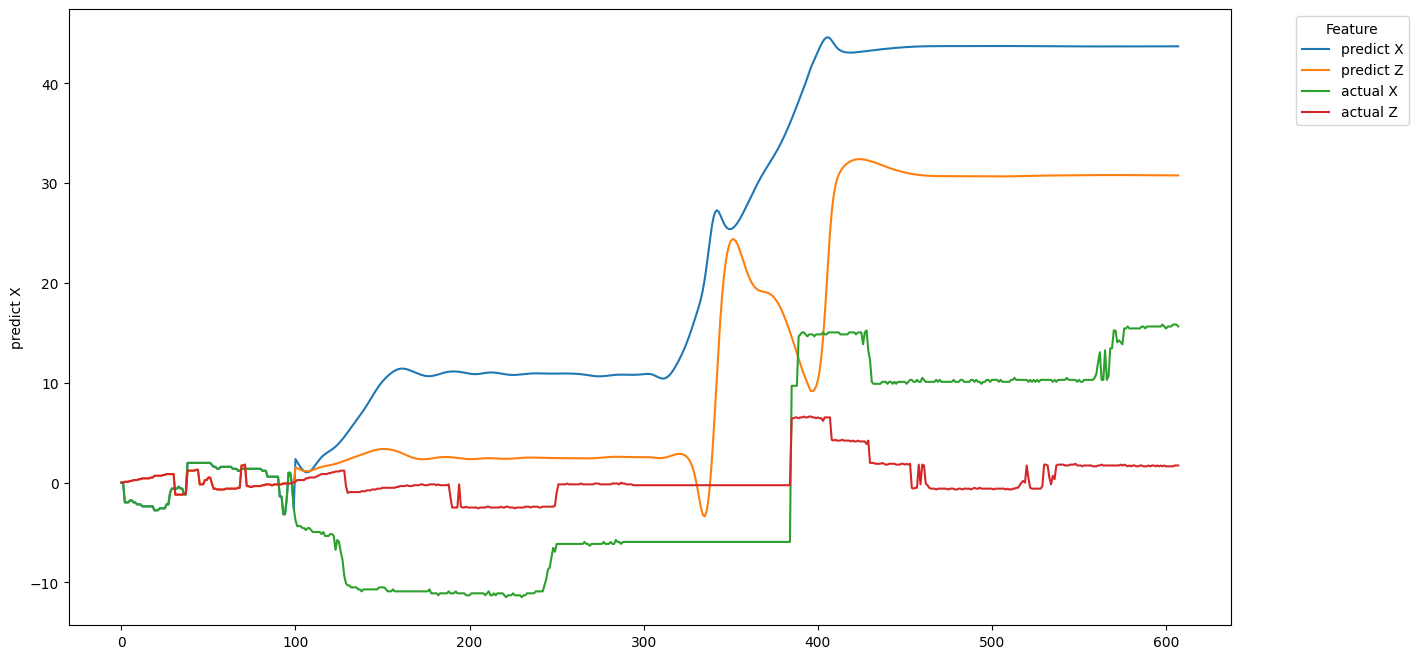

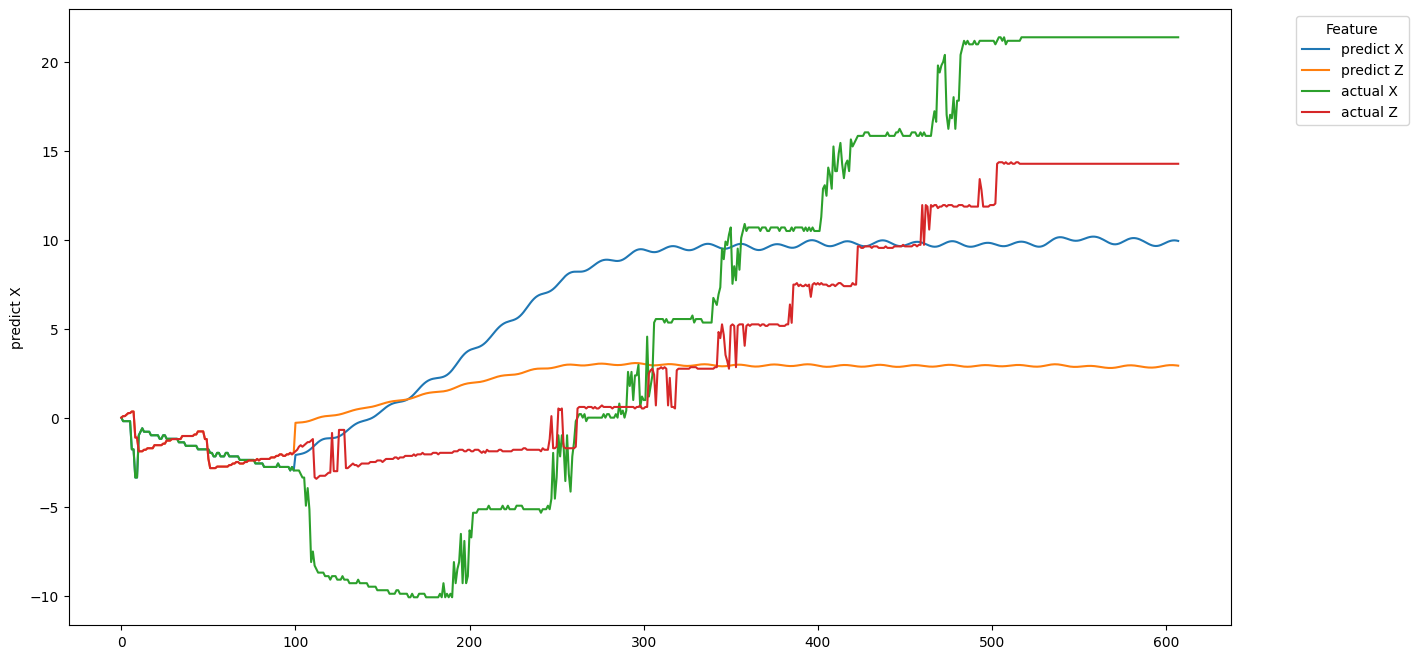

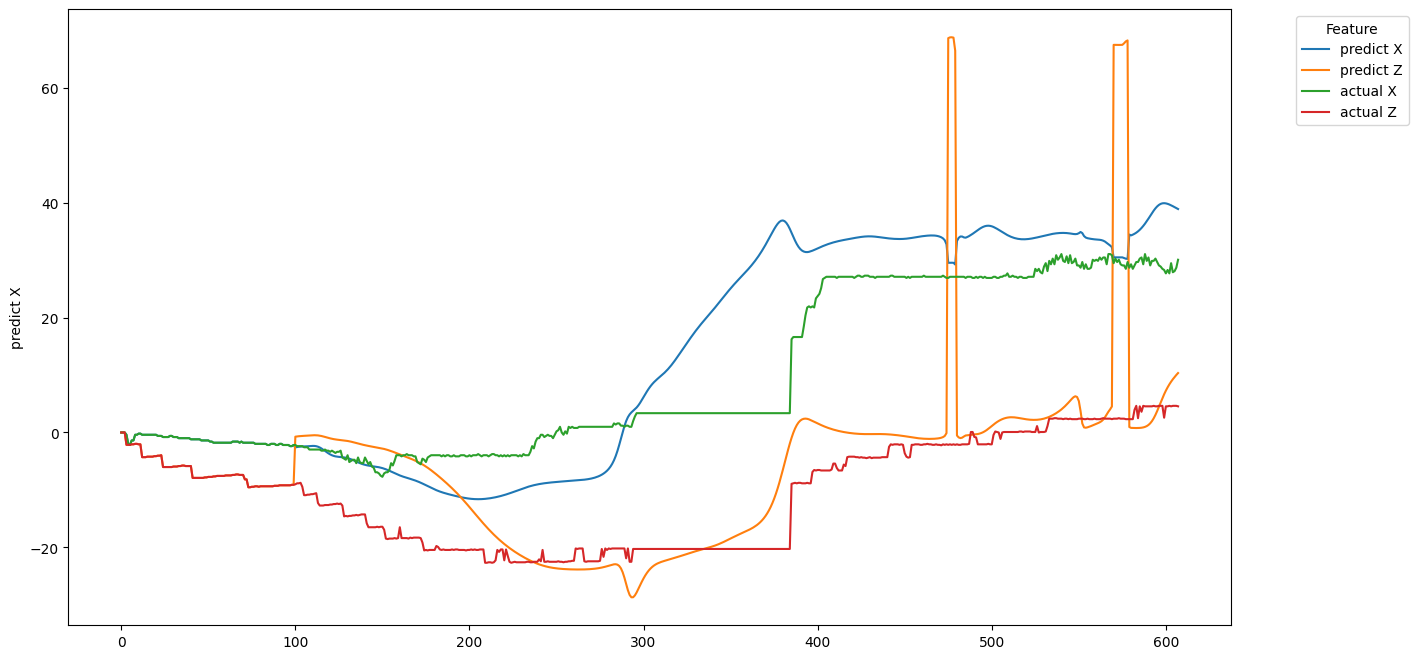

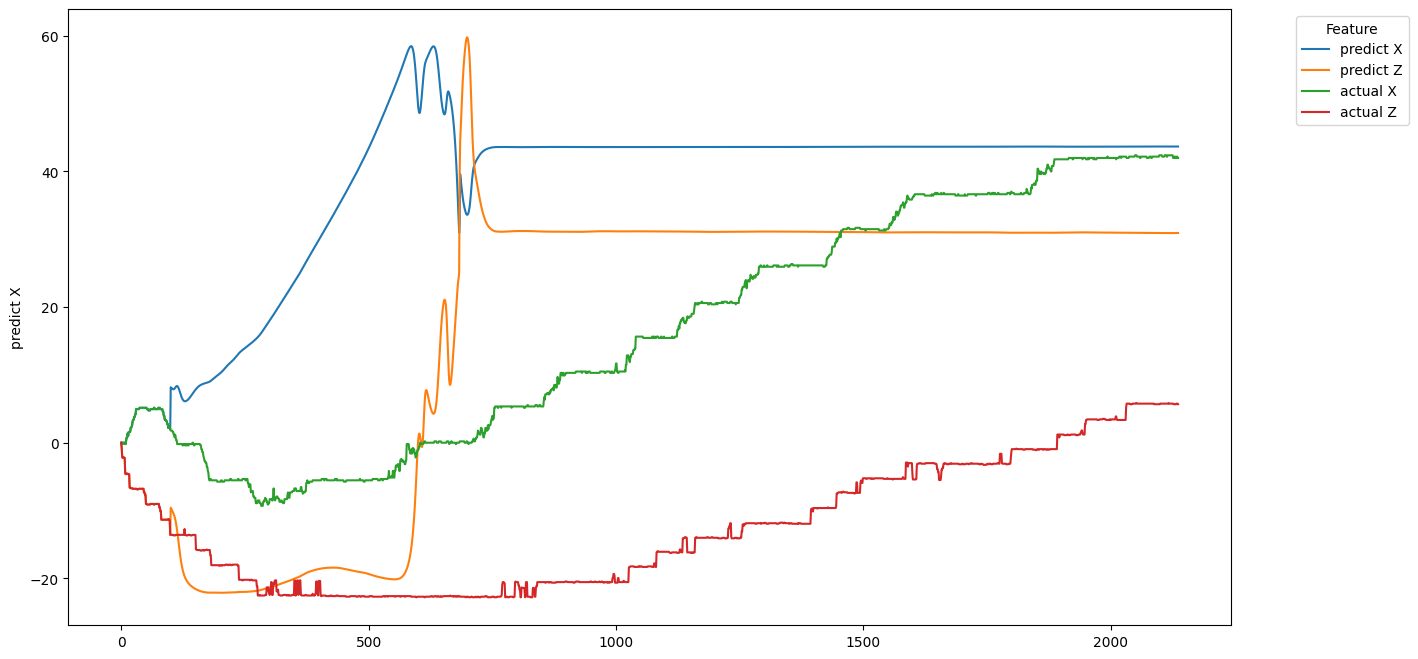

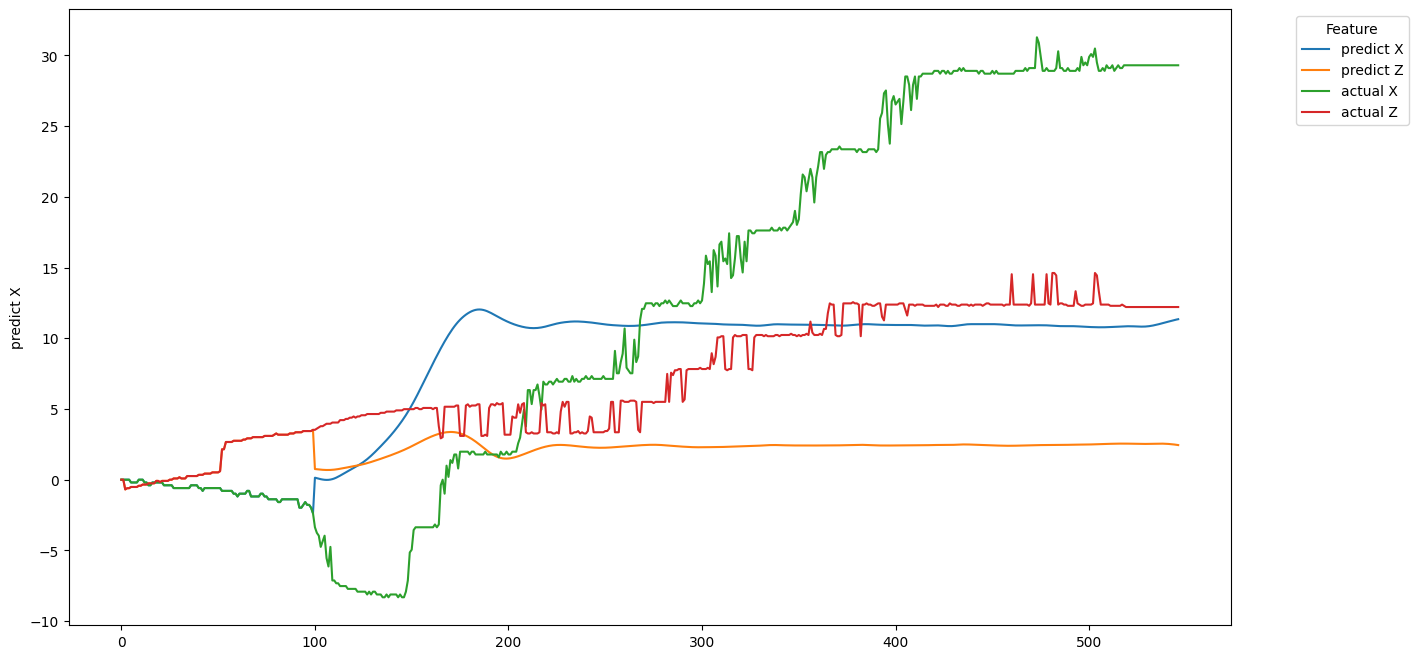

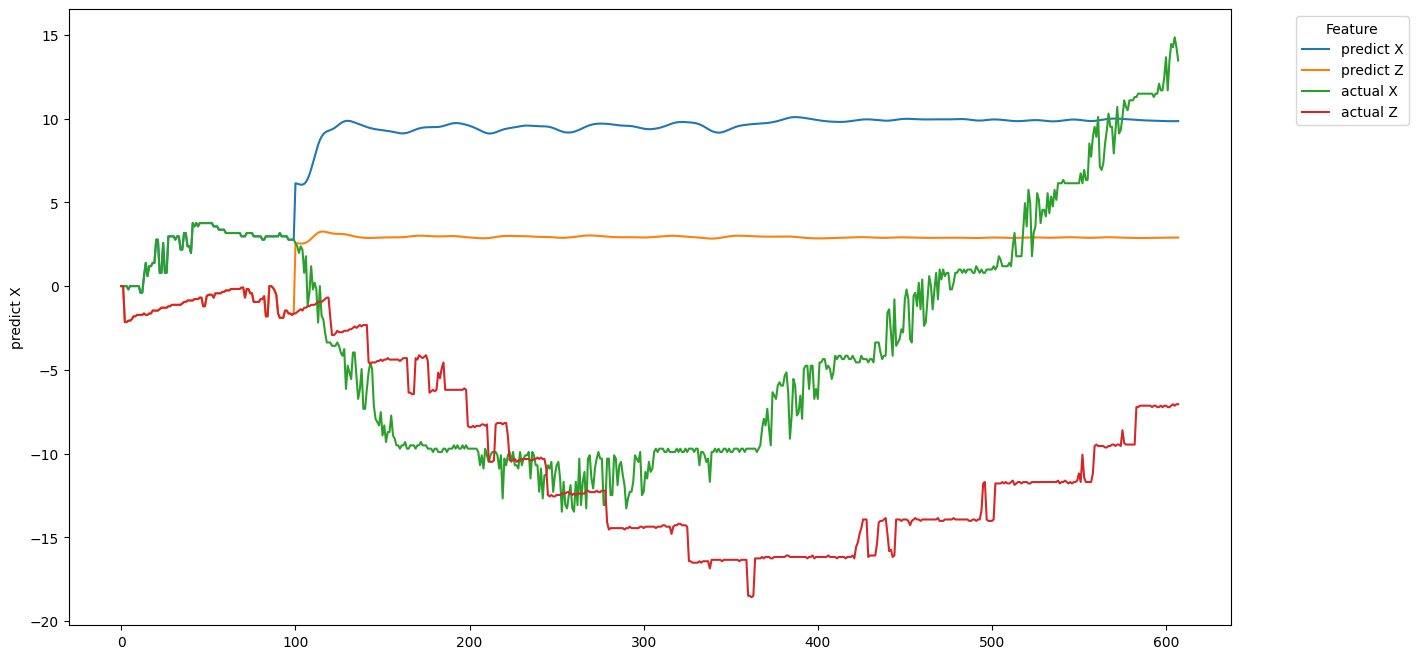

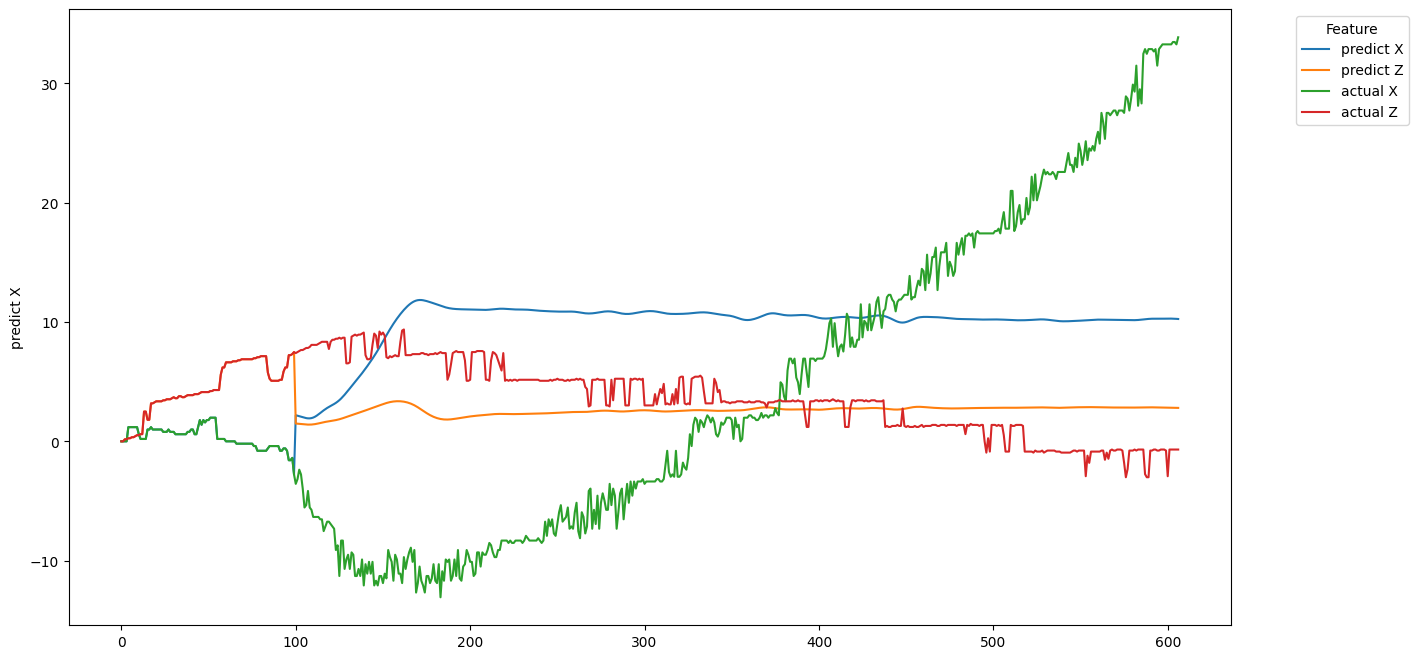

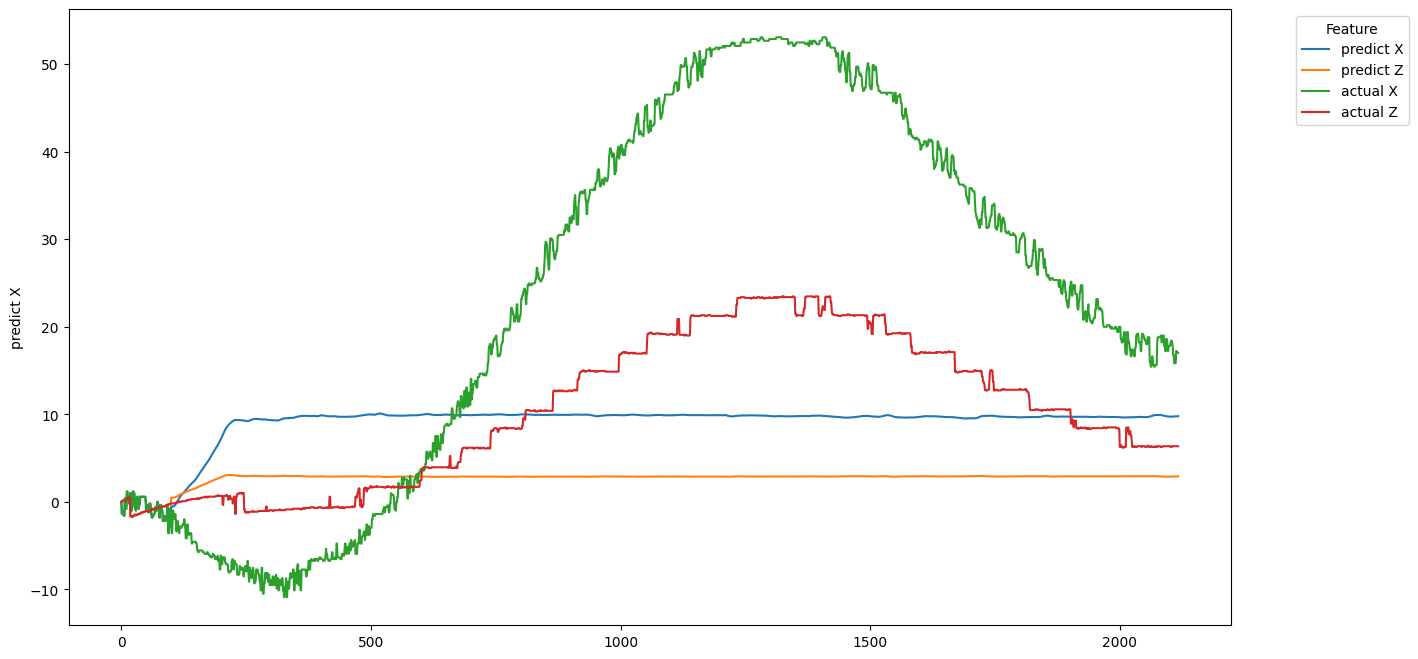

In [32]:
################# 預測繪圖
labels = ['predict X', 'predict Z', 'actual X', 'actual Z']

for i in range(len(predict_list)):
  temp = predict_list[i]
  p1 = np.concatenate([temp[0][:100, :], temp[0][:100, :]], axis=1)
  p2 = np.concatenate([temp[0][100:, :], temp[1][:, :]], axis=1)
  p = np.concatenate([p1, p2], axis=0)
  dfp = pd.DataFrame(p, columns=labels)

  x_index = [i for i in range(p.shape[0])]
  lineplot_fun(dfp, ['predict X', 'predict Z', 'actual X', 'actual Z'], x_index, labels=labels)

In [ ]:
import os
os.listdir('./validation')

# 比賽測試資料輸入

In [ ]:
train_path = [
  './train_process/_20200617_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-25C).csv',
  './train_process/_20200618_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-25C).csv',
  './train_process/_20200701_GV1-1203_2000rpm_XZ-5m-min_5H(wAC-from0-20C).csv',
  './train_process/_20200702_GV1-1203_1000rpm_XZ-5m-min_5H(wAC-from0-20C).csv',
  './train_process/_20200703_GV1-1203_1k+2krpm_XZ-5m-min_5H(wAC-from0-20C).csv',
  './train_process/_20200706_GV1-1203_2k+1krpm_XZ-5m-min_5H(wAC-from0-20C).csv',
  './train_process/_20200708_GV1-1203_2000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
  './train_process/_20200709_GV1-1203_1000rpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
  './train_process/_20200710_GV1-1203_1k+2krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
  './train_process/_20200713_GV1-1203_2k+1krpm_XZ-5m-min_6H(wAC-from0-20Cto25C).csv',
]

In [ ]:
###### model load and predict
# define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'使用設備：{device}')

model_path = './models/lstm_model.checkpoint'
model = LSTMModel_v1(input_size, hidden_layer_size, num_layers, output_size).to(device)
model.load_state_dict(torch.load(model_path))
model.eval()  # Set the model to evaluation mode

for i, (X_test_tensor, y_test_tensor) in enumerate(zip(test_sequences, test_targets)):
  X_test_tensor = X_test_tensor.to(device)
  y_test_tensor = y_test_tensor.to(device)

  predict = X_test_tensor[0, :, -2:]
  for j in range(X_test_tensor.shape[0]):
    X_test_tensor_temp = X_test_tensor[j, :, :26]
    X_test_tensor_temp = torch.cat((X_test_tensor_temp, predict[-100:, :]), dim=1)
    with torch.no_grad():
      test_outputs = model(X_test_tensor_temp.unsqueeze(0))
      predict = torch.cat([predict, test_outputs], dim=0)

  rmse = mean_squared_error(predict[100:] * 50, y_test_tensor.squeeze() * 50)
  rmse_list.append(rmse)




def load_and_predict(model, model_path, df, feats, scaler_patameter):
  """
  Loads a trained PyTorch model and makes predictions.

  Args:
    model: The PyTorch model to load.
    model_path: The path to the saved model state dictionary.
    df: The input DataFrame for prediction.
    feats: A list of features used for training.
    scaler_patameter: The scaler parameters used for standardization.

  Returns:
    A NumPy array of predictions.
  """
  model.load_state_dict(torch.load(model_path))
  model.eval()  # Set the model to evaluation mode

  # Preprocess the data
  df_processed = self_lstm_standard_scaler(df, feats, scaler_patameter)
  # Assuming input_length and output_length are defined
  all_sequences, _ = data_process(df_processed, input_length, output_length)

  with torch.no_grad():
    predictions = model(all_sequences.to(device))

  # Inverse scale the predictions if necessary (assuming scaler was fitted on the target)
  # Note: This might need adjustment based on how your scaler was used and what you are predicting
  # If you scaled all features together, you might need to inverse transform only the prediction columns
  # predictions_scaled_back = predictions.cpu().numpy() * scaler_patameter[-2:] # Example for Disp. X and Disp. Z

  return predictions.cpu().numpy()

# Gemini 生成

# Task
使用 torch 建立一個多因子的 LSTM 模型，並使用提供的資料進行訓練和評估。

In [ ]:
xfeats = [
  'speed', 'feed_rate',
  'PT01', 'PT02', 'PT03', 'PT04', 'PT05', 'PT06', 'PT07', 'PT08', 'PT09', 'PT10', 'PT11', 'PT12', 'PT13',
  'TC01', 'TC02', 'TC03', 'TC04', 'TC05', 'TC06', 'TC07', 'TC08',
  'Spindle Motor', 'X Motor', 'Z Motor',
]

yfeats = [
  'Disp. X', 'Disp. Z'
]

## Prepare data for lstm

### Subtask:
Format the data into sequences suitable for LSTM input, considering the time series nature of the data.


**Reasoning**:
Define the sequence length and create empty lists to store the sequences and targets.



In [ ]:
sequence_length = 10  # Define the lookback window
all_sequences = []
all_targets = []

**Reasoning**:
Iterate through the processed training data files, load each file, extract features, create sequences and targets, and store them.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for path in train_datas_path:
    df = pd.read_csv(path)
    df = df[xfeats]  # Select only the specified features

    # Scale the data
    scaled_data = scaler.fit_transform(df)

    for i in range(len(scaled_data) - sequence_length):
        seq = scaled_data[i:i+sequence_length]
        target = scaled_data[i+sequence_length]
        all_sequences.append(seq)
        all_targets.append(target)
    break

In [ ]:
len(scaled_data)

515

In [ ]:
scaled_data.shape

(515, 26)

**Reasoning**:
Convert the lists of sequences and targets into NumPy arrays and then into PyTorch tensors, which are suitable formats for training a PyTorch LSTM model.



In [ ]:
import torch

# Convert to numpy arrays
all_sequences = np.array(all_sequences)
all_targets = np.array(all_targets)

# Convert to PyTorch tensors
all_sequences = torch.tensor(all_sequences, dtype=torch.float32)
all_targets = torch.tensor(all_targets, dtype=torch.float32)

print("Shape of all_sequences:", all_sequences.shape)
print("Shape of all_targets:", all_targets.shape)

Shape of all_sequences: torch.Size([29365, 10, 28])
Shape of all_targets: torch.Size([29365, 28])


## Define lstm model

### Subtask:
Create a PyTorch LSTM model class with appropriate layers for multivariate input.


**Reasoning**:
Import necessary PyTorch modules and define the LSTM model class as specified in the instructions.



In [ ]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, num_layers, output_size):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

input_size = all_sequences.shape[-1]
hidden_layer_size = 100
num_layers = 2
output_size = all_targets.shape[-1]

model = LSTMModel(input_size, hidden_layer_size, num_layers, output_size)
print(model)

LSTMModel(
  (lstm): LSTM(28, 100, num_layers=2, batch_first=True)
  (linear): Linear(in_features=100, out_features=28, bias=True)
)


## Train the model

### Subtask:
Implement the training loop, including defining a loss function and optimizer, and training the model on the prepared data.


**Reasoning**:
Define the loss function and optimizer, set the number of epochs, and implement the training loop to train the LSTM model.



In [ ]:
import torch.optim as optim

# Define loss function and optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the number of training epochs
epochs = 10

# Training loop
for i in range(epochs):
    for j in range(0, len(all_sequences)):
        seq = all_sequences[j].unsqueeze(0) # Add batch dimension
        target = all_targets[j].unsqueeze(0) # Add batch dimension

        optimizer.zero_grad()

        y_pred = model(seq)

        single_loss = loss_function(y_pred, target)
        single_loss.backward()
        optimizer.step()

    if i % 1 == 0:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')


epoch:   0 loss: 0.00021193


KeyboardInterrupt: 